In [26]:
# To display all outputs, we use the following codes : 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sbn
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C://Users//HP//OneDrive//book//"))

# Any results you write to the current directory are saved as output.
%matplotlib inline

['.Rhistory', '0001plot.png', '0002plot.png', '0003plot.png', '0004plot.png', '0005plot.png', '0006plot.png', '0007plot.png', '0008plot.png', '0009plot.png', '0010plot.png', '0011plot.png', '0012plot.png', '0013plot.png', '0014plot.png', '0015plot.png', '0016plot.png', '0017plot.png', '0018plot.png', '0019plot.png', '0020plot.png', '0021plot.png', '0022plot.png', '0023plot.png', '0024plot.png', '0025plot.png', '0026plot.png', '0027plot.png', '0028plot.png', '0029plot.png', '0030plot.png', '0031plot.png', '0032plot.png', '0033plot.png', '0034plot.png', '0035plot.png', '0036plot.png', '0037plot.png', '0038plot.png', '0039plot.png', '0040plot.png', '0041plot.png', '0042plot.png', '0043plot.png', '0044plot.png', '0045plot.png', '0046plot.png', '0047plot.png', '0048plot.png', '0049plot.png', '0050plot.png', '0051plot.png', '0052plot.png', '0053plot.png', '0054plot.png', '0055plot.png', '0056plot.png', '0057plot.png', '0058plot.png', '0059plot.png', '0060plot.png', '0061plot.png', '0062plot.

In [27]:
import requests
response1 = requests.get("https://s3.amazonaws.com/baywheels-data/index.html")
response2 = requests.get("https://s3.amazonaws.com/baywheels-data/index.html/2017-fordgobike-tripdata.csv")

In [28]:
response1
response2


<Response [200]>

<Response [404]>

+ 200: Everything went okay, and the result has been returned (if any) 
+ 301: The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.
+ 400: The server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
+ 401: The server thinks you’re not authenticated. Many APIs require login ccredentials, so this happens when you don’t send the right credentials to access an API.
+ 403: The resource you’re trying to access is forbidden: you don’t have the right permissions to see it.
+ 404: The resource you tried to access wasn’t found on the server
+ 503: The server is not ready to handle the request.


Generally, we observe that all of the status codes that begin with a '4' or '5' indicate some sort of error, while code status start with 2 was sucessful and 



In [29]:
import glob
import theano.tensor as T
import theano
from sklearn.metrics import mean_squared_error

In [44]:
df=pd.concat([pd.read_csv(f,sep=";") for f in glob.glob('C://Users//HP//OneDrive//book//201801-fordgobike-tripdata.csv')])
df.count()[0]

df=df.dropna()

df.head()

94802

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [40]:
df  = pd.read_csv('C://Users//HP//OneDrive//book//201801-fordgobike-tripdata.csv',sep=";")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [45]:
df["start_day"]=pd.to_datetime(df["start_time"], errors='ignore')
df["start_day"]= df['start_day'].dt.floor("d")
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,2018-01-31
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,2018-01-31
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,2018-01-31
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,2018-01-31
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,2018-01-31


In [46]:
df=pd.get_dummies(columns=["user_type"],data=df)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,bike_share_for_all_trip,start_day,user_type_Customer,user_type_Subscriber
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,No,2018-01-31,0,1
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,No,2018-01-31,1,0
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,No,2018-01-31,1,0
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,No,2018-01-31,1,0
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,No,2018-01-31,0,1


In [47]:
aggregations = {
    "user_type_Customer":"sum",
    "user_type_Subscriber":"sum",  
}
day=df.groupby("start_day").agg(aggregations)
day.head()

,user_type_Customer,user_type_Subscriber
start_day,,
2018-01-01,580.0,795.0
2018-01-02,377.0,2875.0
2018-01-03,235.0,2622.0
2018-01-04,277.0,3023.0
2018-01-05,238.0,1912.0


In [48]:
dayList = day.index.day_name()
dayList

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='start_day')

In [49]:
day["total_riders"]=day["user_type_Customer"]+day["user_type_Subscriber"]

In [50]:
print (len(day["total_riders"]))
nextDay=list(day["total_riders"])
nextDay.pop(0)#Don't need this value anymore
nextDay.append(0.0)#Add a zero to the next one as a test
print (len(nextDay))
#print (nextDay)

31


1375.0

31


In [51]:
from sklearn.preprocessing import RobustScaler
scaledDF = RobustScaler().fit_transform(day)
scaledDF = pd.DataFrame(data=scaledDF, columns = ["scaled_"+str(x) for x in day.columns])

In [52]:
scaledDF['day'] = dayList

dayLookup = pd.DataFrame({"day": scaledDF.day.unique(), "dayIndex": range(7)})

In [53]:
scaledDF["nextDay"]=nextDay
scaledDF=scaledDF[:len(nextDay)-1]
scaledDF.tail(5)

,scaled_user_type_Customer,scaled_user_type_Subscriber,scaled_total_riders,day,nextDay
25,0.067039,0.281772,0.328267,Friday,2348.0
26,2.044693,-0.614863,-0.499586,Saturday,2177.0
27,2.513966,-0.738320,-0.594087,Sunday,4467.0
28,0.279330,0.564028,0.671456,Monday,4731.0
29,0.435754,0.678286,0.817353,Tuesday,4476.0


In [54]:
scaledDF = pd.merge(scaledDF, dayLookup, on=["day"],how='left'  )
scaledDF.tail(5)

,scaled_user_type_Customer,scaled_user_type_Subscriber,scaled_total_riders,day,nextDay,dayIndex
25,0.067039,0.281772,0.328267,Friday,2348.0,4
26,2.044693,-0.614863,-0.499586,Saturday,2177.0,5
27,2.513966,-0.738320,-0.594087,Sunday,4467.0,6
28,0.279330,0.564028,0.671456,Monday,4731.0,0
29,0.435754,0.678286,0.817353,Tuesday,4476.0,1


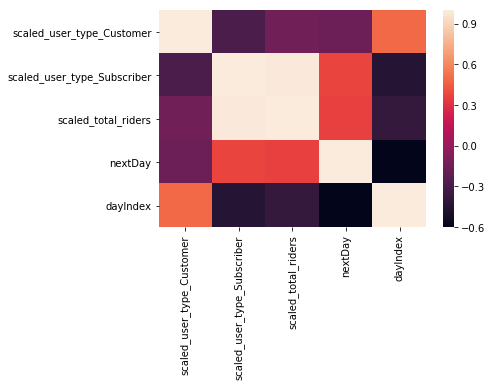

In [55]:
import seaborn as sns
corr = scaledDF.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

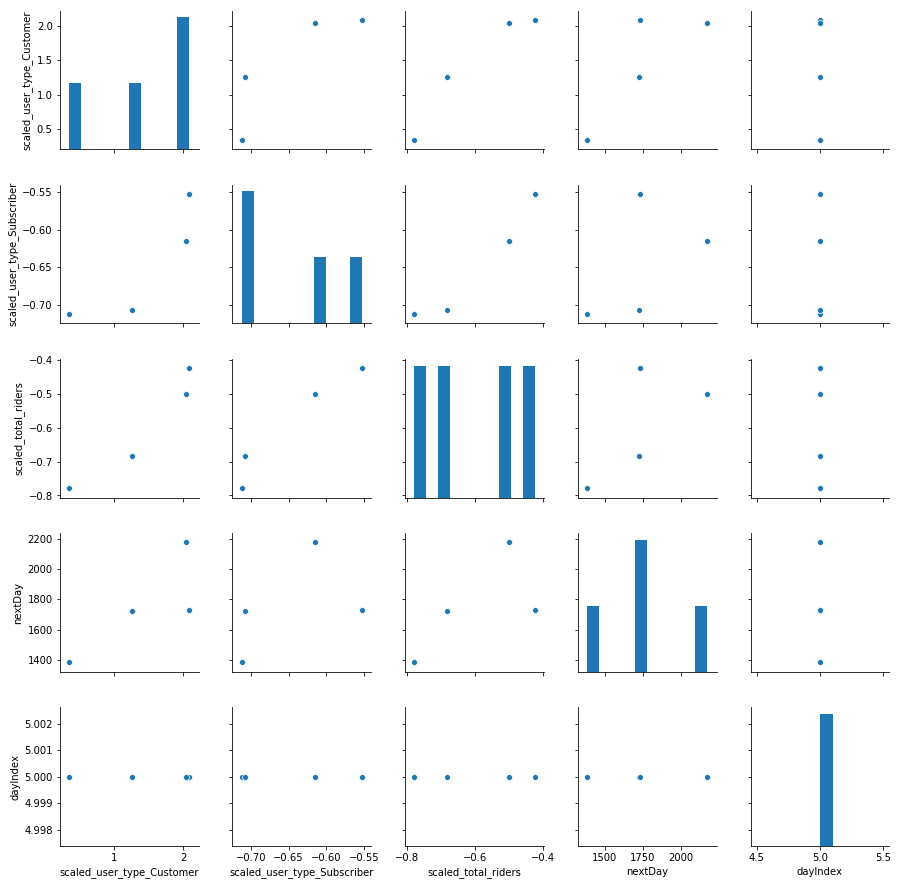

In [56]:
"""
If we plot the distributions of these variables, we see 
significant co-linearity among some variables with respect 
to the next day predictions. Predictably, categorical features
that exist in the majority (male ridership and subscription riders)
have strong relationships.
"""

g = sbn.pairplot(scaledDF[scaledDF['day']=='Saturday']);

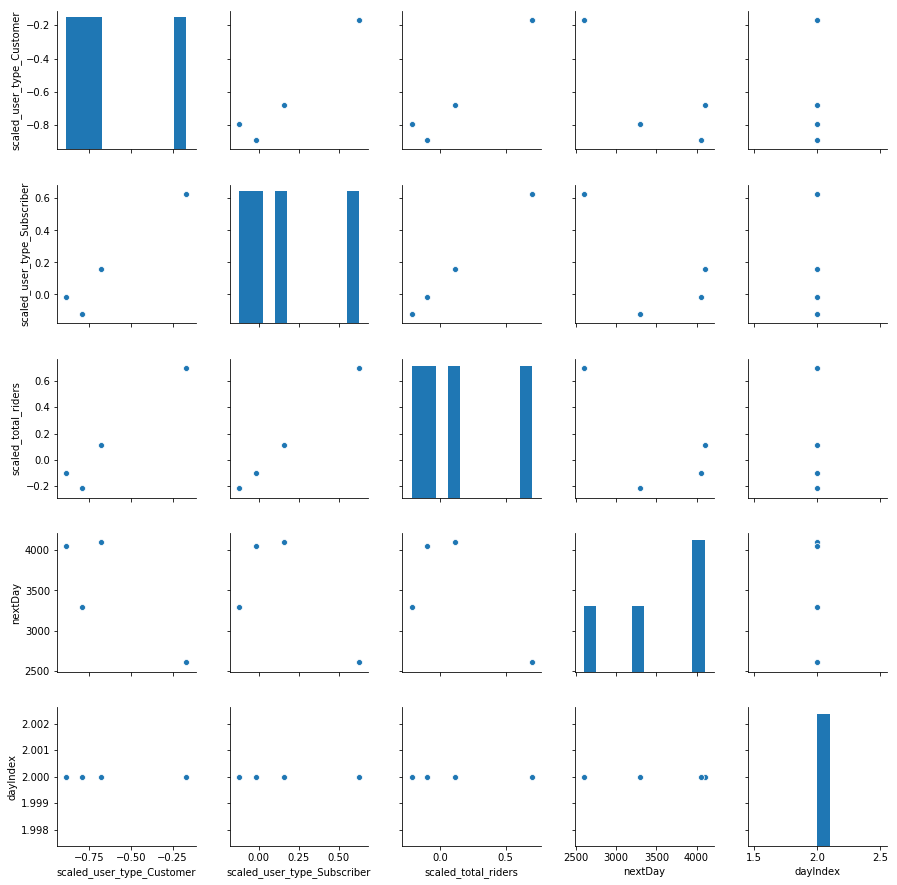

In [58]:
"""When we plotted the entirety of distributions together (all days of the week),
we could see multiple, linear relationships in the data. Now we observe what 
look to be very tight correlations.
"""

g = sbn.pairplot(scaledDF[scaledDF['day']=='Wednesday']);

In [59]:
print ("Let us try some baseline predictions: Naive Average of all ridership")

naivePreds=np.ones(len(scaledDF['nextDay']))+np.mean(day['total_riders'])
np.sqrt(mean_squared_error(scaledDF["nextDay"], naivePreds))

Let us try some baseline predictions: Naive Average of all ridership


1078.6653155107394

In [60]:
print ("What if we simply look back one day and see if that is a good predictor?")
np.sqrt(mean_squared_error(scaledDF["nextDay"], day["total_riders"][:len(scaledDF["nextDay"])]))

What if we simply look back one day and see if that is a good predictor?


1225.910477971373

In [61]:

y = scaledDF["nextDay"]
X = scaledDF['scaled_total_riders']
index = scaledDF.dayIndex

#Let's test our model on the last 30 days of data
month_split = len(y)-30
X_train , Y_train, Index_train =  X[:month_split], y[:month_split], index[:month_split]
X_test , Y_test, Index_test = X[month_split:], y[month_split:], index[month_split:]

model_index = theano.shared(np.array(Index_train))
model_input = theano.shared(np.array(X_train))
model_output = theano.shared(np.array(Y_train))

In [62]:
import pymc3 as pm

print('Running on PyMC3 v{}'.format(pm.__version__))

C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\HP\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Running on PyMC3 v3.7


In [64]:
hierarchical_model = pm.Model()

nDays = len(scaledDF.dayIndex.unique())
with hierarchical_model:

    """
    Meta Priors: For each day of the week, we 
    should have a different set of distributions. Potentially
    we could have different priors even for the season,
    weather, etc.
    """
    day_alpha = pm.Normal('day_alpha', mu=0, sd=100)
    day_beta = pm.Normal('day_beta', mu=0, sd=100)
    
    """
    Model the uncertainty of our parent distributions 
    with a HalfCauchy with beta = 4.
    """
    sigma_day_alpha = pm.HalfCauchy('sigma_day_alpha', 4)
    sigma_day_beta = pm.HalfCauchy('sigma_day_beta', 4)
    
    """
    Now we draw distributions depending on the day from
    the above values
    """ 

    alpha = pm.Normal('alpha', mu = day_alpha, sd = sigma_day_alpha, shape = nDays )
    beta = pm.Normal('beta', mu = day_beta, sd = sigma_day_beta, shape = nDays )

    # Expected value of outcome  
    values = np.exp(alpha[model_index] + beta[model_index]*model_input )
     # Likelihood (samplYeah does noting distribution) of observations
    Y_obs = pm.Poisson('Y_obs', mu=values, observed=model_output)
    

'\n    Meta Priors: For each day of the week, we \n    should have a different set of distributions. Potentially\n    we could have different priors even for the season,\n    weather, etc.\n    '

'\n    Model the uncertainty of our parent distributions \n    with a HalfCauchy with beta = 4.\n    '

'\n    Now we draw distributions depending on the day from\n    the above values\n    '

In [65]:
with hierarchical_model:
    trace = pm.sample(8000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha, sigma_day_beta, sigma_day_alpha, day_beta, day_alpha]
Sampling 4 chains: 100%|████████████████████████████████████████████████████| 34000/34000 [1:29:39<00:00, 21.44draws/s]
There were 1273 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7140609736796624, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4643 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2670323725727226, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2604 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.43521281064739753, but should be close to 0.8. Try to increase 

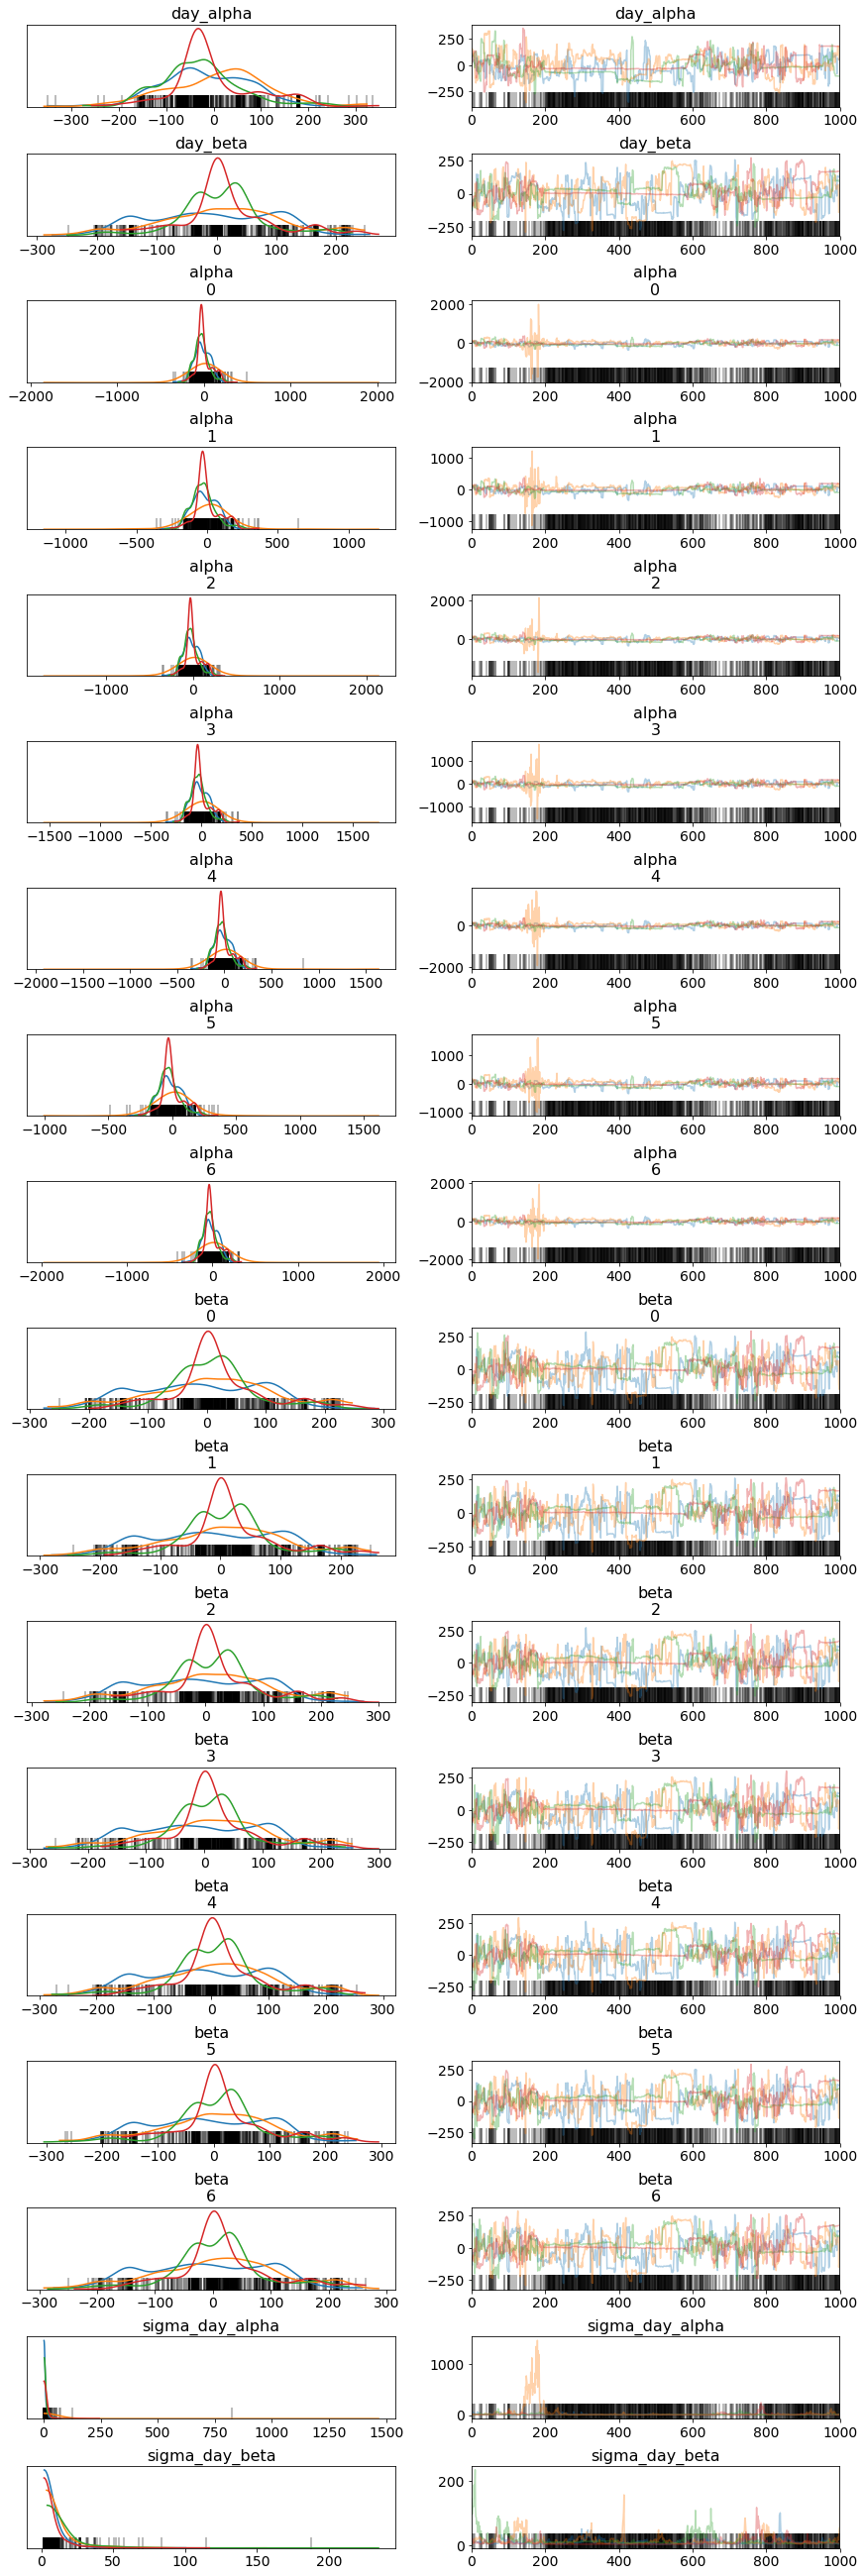

In [66]:
pm.traceplot(trace[-1000:]);

In [67]:
pm.summary(trace[-1000:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
day_alpha,-8.412705,93.015511,5.737943,-170.920919,181.277053,125.287679,1.016209
day_beta,7.110977,92.739190,5.870699,-164.458162,224.459151,153.325601,1.008915
alpha__0,-8.933004,125.190086,5.921096,-182.480462,198.079567,284.969303,1.008522
alpha__1,-8.531846,108.248858,5.830558,-181.294605,191.071807,184.249516,1.011863
alpha__2,-7.300062,114.200400,5.883746,-185.041730,187.689727,237.390235,1.012228
alpha__3,-7.309262,115.594802,5.974047,-182.407892,186.054182,195.981971,1.013145
alpha__4,-5.438980,127.323235,5.988078,-179.769597,199.837756,243.102258,1.014120
alpha__5,-7.041981,113.204219,5.712556,-180.564327,190.465039,221.112638,1.012379
alpha__6,-9.433069,123.980895,5.863089,-193.116647,195.628038,279.295718,1.008149
beta__0,7.090066,94.006667,5.880021,-176.115371,218.319006,157.003259,1.008907


In [69]:
#fileObject = open("models/nuts_trace_hierarchical.pickle",'wb')  
#pickle.dump(trace, fileObject)
#fileObject.close()

FileNotFoundError: [Errno 2] No such file or directory: 'models/nuts_trace_hierarchical.pickle'

In [70]:
with hierarchical_model:
    inference = pm.ADVI()
    approx = pm.fit(n=100000, method=inference)

Average Loss = 11.174: 100%|███████████████████████████████████████████████████| 100000/100000 [16:51<00:00, 98.85it/s]
Finished [100%]: Average Loss = 11.174


In [71]:
advi_trace = approx.sample(6000)

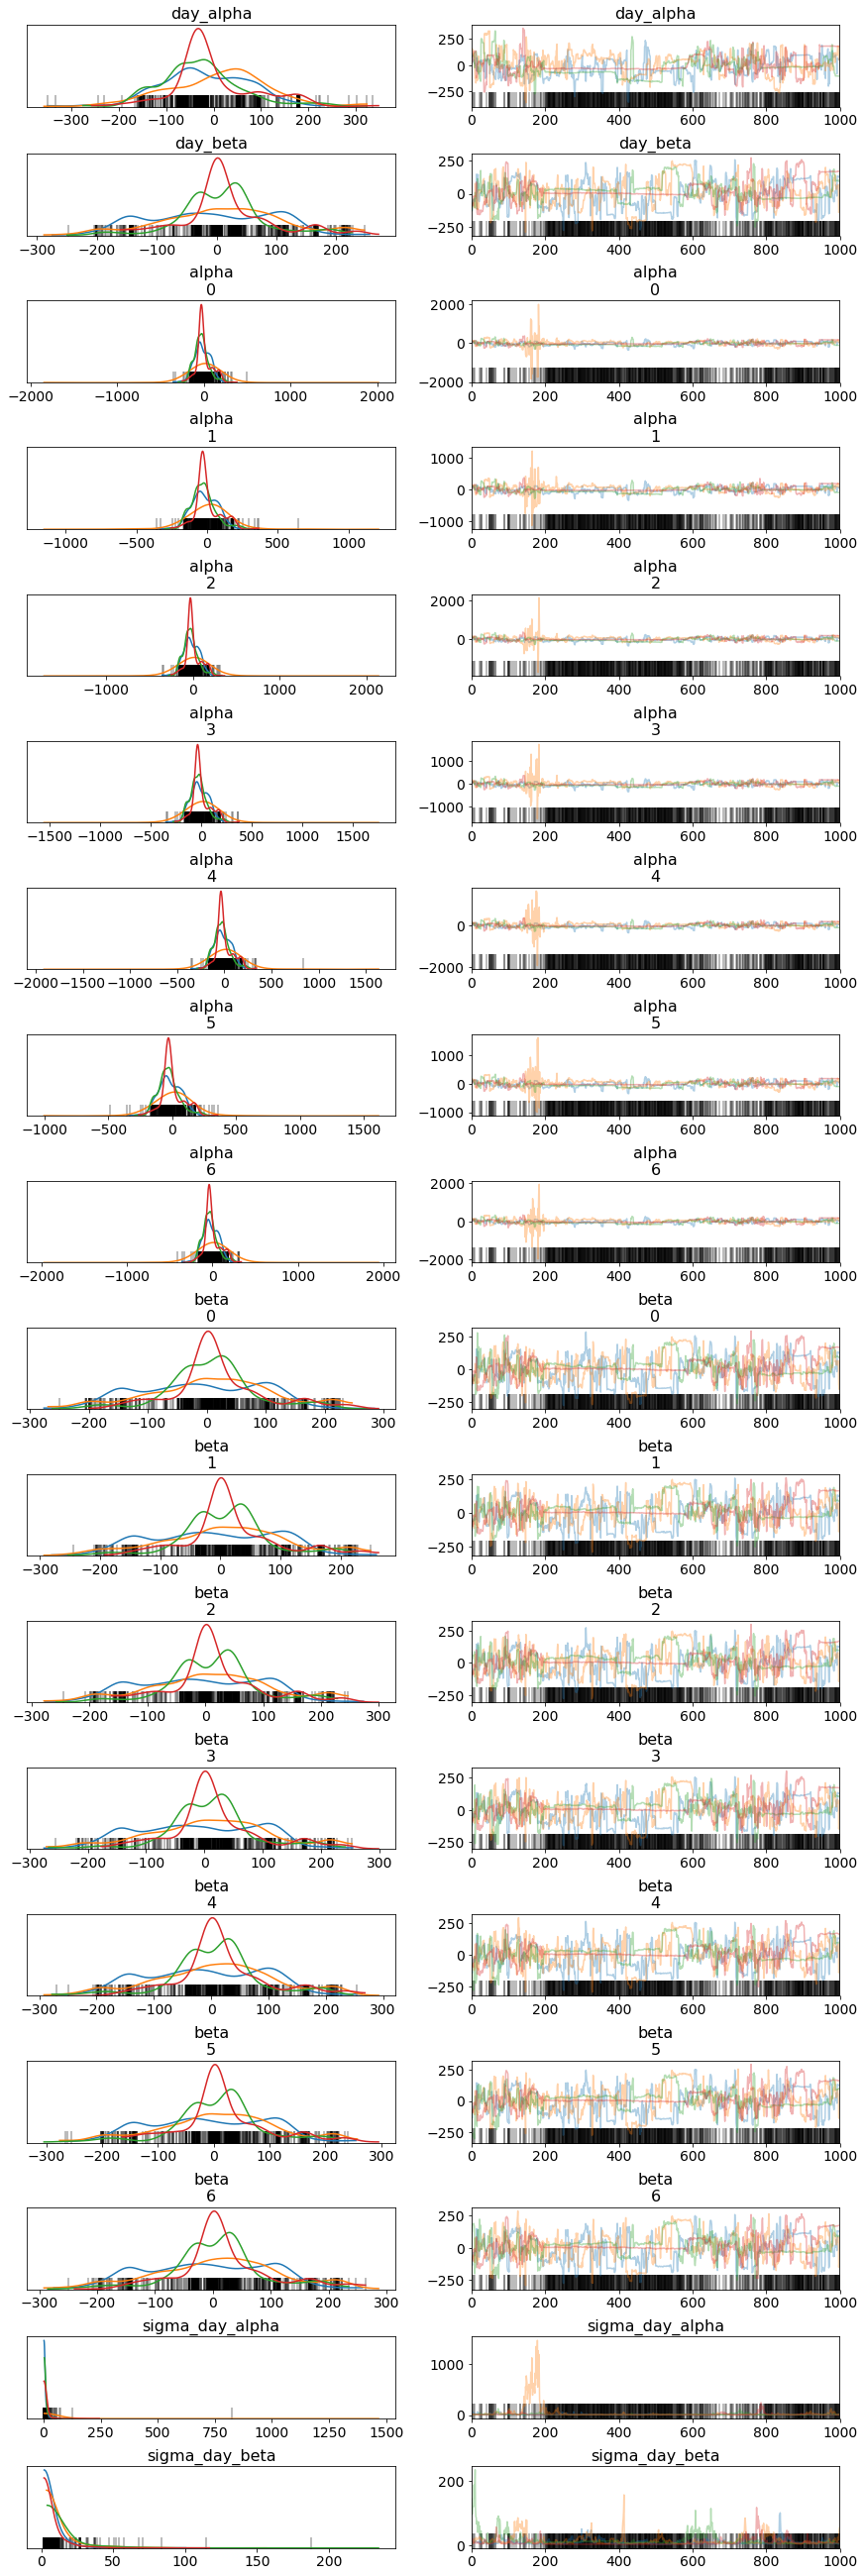

In [72]:
pm.traceplot(trace[-1000:]);

In [1]:
pwd()

'C:\\Users\\HP'